In [4]:
import numpy as np

words = ['I', 'like', 'enjoy', 'deep', 'learning', 'NLP', 'flying', '.']
X = np.array([[0,2,1,0,0,0,0,0],
              [2,0,0,1,0,1,0,0],
              [1,0,0,0,0,0,1,0],
              [0,1,0,0,1,0,0,0],
              [0,0,0,1,0,0,0,1],
              [0,1,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,1],
              [0,0,0,0,1,1,1,0]])

In [5]:
U, Sigma, V = np.linalg.svd(X, full_matrices=False)

In [6]:
_Sigma = np.diag(Sigma[:2])
_Sigma

array([[2.75726275, 0.        ],
       [0.        , 2.678248  ]])

I [-1.44515015 -1.53425886]
like [-1.63902195  1.68761941]
enjoy [-0.70661477  0.73388691]
deep [-0.78757738 -0.66397017]
learning [-0.53253583  0.09065737]
NLP [-0.8413365  -0.78737543]
flying [-0.50317243 -0.4312723 ]
. [-0.68076383  0.42116725]


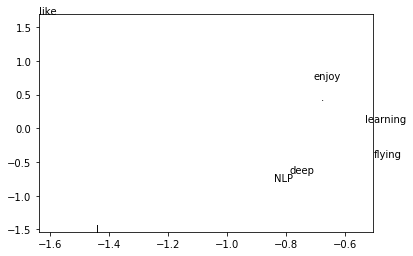

In [8]:
import matplotlib.pyplot as plt

US = U[:,:2].dot(_Sigma)
SV = _Sigma.dot(V[:2])

for t, _repr in zip(words, US):
    print(t, _repr)
    plt.text(_repr[0], _repr[1],t)
plt.xlim(US[:,0].min(), US[:,0].max())
plt.ylim(US[:,1].min(), US[:,1].max())
plt.show()

In [11]:
query = US[words.index('deep')]
US.shape, query.shape

((8, 2), (2,))

In [12]:
result = np.linalg.norm(US - np.repeat(query, len(words)).reshape(2, -1).T, axis=1)

for dist,w in zip(result, words):
    print(w, dist)

I 1.0907815298565635
like 2.50098608415167
enjoy 1.400199757357459
deep 0.0
learning 0.7965606768052841
NLP 0.1346064624142894
flying 0.3674703765181284
. 1.0903817475676907


In [13]:
queryMat = np.repeat(query, len(words), axis=0).reshape(-1, 8).T

for t, dist in zip(words, np.linalg.norm(US-queryMat, axis=1)):
    if t != 'deep':
        print(t,dist)

sorted({t:dist for t, dist in 
        zip(words, np.linalg.norm(US-queryMat, axis=1))}.\
       items(), key=lambda x:x[1])[0]

I 1.0907815298565635
like 2.50098608415167
enjoy 1.400199757357459
learning 0.7965606768052841
NLP 0.1346064624142894
flying 0.3674703765181284
. 1.0903817475676907


('deep', 0.0)

In [16]:
documents = [
    'king is a strong man',
    'queen is a wise woman',
    'boy is a young man',
    'girl is a young woman',
    'prince is a young king',
    'princess is a young queen',
    'man is strong',
    'woman is pretty',
    'prince is a boy will be king',
    'princess is a girl will be queen'
]

stopwords = ['is', 'a', 'will', 'be']

In [17]:
vocabulary = list()
_documents = list()

for document in documents:
    termList = list()
    for term in document.lower().split():
        if term not in stopwords:
            termList.append(term)
            vocabulary.append(term)
    _documents.append(termList)
vocabulary = list(set(vocabulary))

In [18]:
len(vocabulary), (12, 12), _documents

(12,
 (12, 12),
 [['king', 'strong', 'man'],
  ['queen', 'wise', 'woman'],
  ['boy', 'young', 'man'],
  ['girl', 'young', 'woman'],
  ['prince', 'young', 'king'],
  ['princess', 'young', 'queen'],
  ['man', 'strong'],
  ['woman', 'pretty'],
  ['prince', 'boy', 'king'],
  ['princess', 'girl', 'queen']])

In [19]:
V = len(vocabulary)
X = np.zeros((V, V))

In [20]:
K = 1
for document in _documents:
    for v in range(len(document) - K):
        i = vocabulary.index(document[v])
        j = vocabulary.index(document[v+K])
        X[i][j] += 1
        X[j][i] += 1


In [21]:
import pandas as pd

pd.DataFrame(X, index=vocabulary, 
             columns=vocabulary, dtype=int)

,woman,strong,princess,girl,queen,king,pretty,wise,prince,man,young,boy
woman,0,0,0,0,0,0,1,1,0,0,1,0
strong,0,0,0,0,0,1,0,0,0,2,0,0
princess,0,0,0,1,0,0,0,0,0,0,1,0
girl,0,0,1,0,1,0,0,0,0,0,1,0
queen,0,0,0,1,0,0,0,1,0,0,1,0
king,0,1,0,0,0,0,0,0,0,0,1,1
pretty,1,0,0,0,0,0,0,0,0,0,0,0
wise,1,0,0,0,1,0,0,0,0,0,0,0
prince,0,0,0,0,0,0,0,0,0,0,1,1
man,0,2,0,0,0,0,0,0,0,0,1,0


In [22]:
U, Sigma, V = np.linalg.svd(X, full_matrices=False)

In [23]:
_Sigma = np.diag(Sigma[:2])
_Sigma

array([[3.69381462, 0.        ],
       [0.        , 3.01139938]])

In [24]:
US = U[:,:2].dot(_Sigma)
SV = _Sigma.dot(V[:2])

woman [-0.76778117 -0.81011387]
strong [-0.87555418  1.22298025]
princess [-0.87691625 -0.50135907]
girl [-1.09145195 -0.17128992]
queen [-1.00699081 -0.6639009 ]
king [-1.12313423 -0.9419351 ]
pretty [-0.2078559   0.26901575]
wise [-0.48047132  0.48947834]
prince [-0.88610171 -0.53581818]
man [-1.05550031 -1.37047342]
young [-2.14771411  1.68108232]
boy [-1.12538134 -0.06751978]


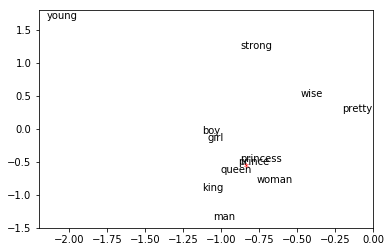

In [25]:
prince = US[vocabulary.index('prince')]
boy = US[vocabulary.index('boy')]
girl = US[vocabulary.index('girl')]

query = prince - boy + girl

result = np.linalg.norm(US - np.repeat(query, len(vocabulary)).reshape(2, -1).T, axis=1)

for t, point in zip(vocabulary, US):
    plt.text(point[0], point[1], t, color='k')
    print(t, point)
    
plt.text(query[0], query[1], '*', color='r')    
plt.xlim(-2.2, .0)
plt.ylim(-1.5, 1.8)
plt.show()

In [26]:
V = len(vocabulary)
queryMat = np.repeat(query, V, axis=0).reshape(-1, V).T

for t, dist in zip(vocabulary,
                np.linalg.norm(US-queryMat, axis=1)):
    if t not in ['prince', 'boy', 'girl']:
        print(t, dist)

woman 0.190265161275482
strong 1.8627153168575024
princess 0.14042643920783432
queen 0.15671587984851987
king 0.405997459665809
pretty 1.1138693793791234
wise 1.188677055870588
man 0.7586404384776873
young 2.6578075027492596


In [27]:
onehot = np.diag(np.ones(V))
onehot[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
word2idx = lambda t:vocabulary.index(t)
idx2word = lambda i:vocabulary.index[i]
idx2vec = lambda i:onehot[i]

In [29]:
word2idx('man'), idx2vec(word2idx('man'))

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]))

In [30]:
def getPair(D, W=2):
    pairList = list()
    for termList in D:
        for i in range(len(termList)):
            s = i - W
            e = i + W + 1
            for j in range(s,e):
                if -1 < j < len(termList) and j != i:
                    pairList.append((termList[j], termList[i]))
    return pairList

In [31]:
_documents[0]

['king', 'strong', 'man']

In [32]:
inputList = list()
outputList = list()

for pair in getPair(_documents, 2):
    inputList.append(idx2vec(word2idx(pair[0])))
    outputList.append(idx2vec(word2idx(pair[1])))

In [33]:
len(inputList), len(outputList)

(52, 52)

In [34]:
np.array(inputList).shape

(52, 12)